In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


In [3]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

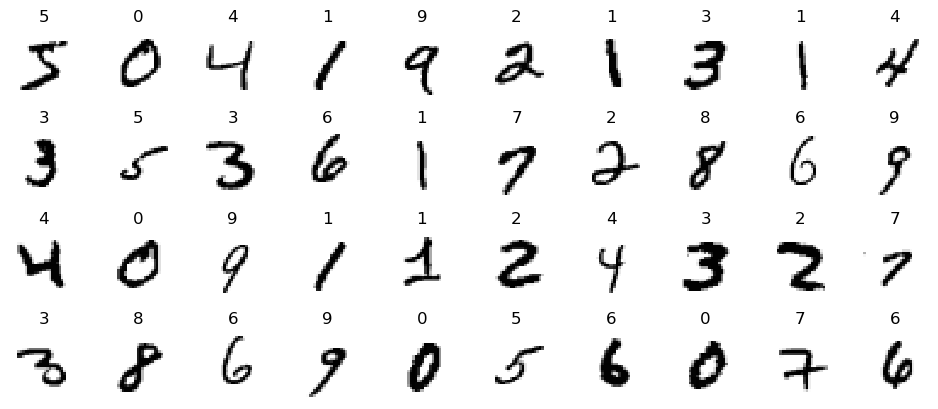

In [4]:
class_names = np.unique(y_train_full)

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [5]:
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
X_train_full.shape

(60000, 28, 28)

Dividimos el X_train e y_train en dos (X_Valid y X_train) el cual se tiene que dividir entre 255 para escalar los valores

In [7]:
X_valid, X_train = X_train_full / 255.0, X_train_full / 255.0
y_valid, y_train = y_train_full, y_train_full
X_test = X_test / 255

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
])

#Softmax convierte un vector de valores en una probabilidad de distribución
model.add(keras.layers.Dense(len(class_names),activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)        

In [9]:
#!pip install pydot_ng==2.0.0
#!pip install pydot==1.4.2
#!conda install -y graphviz

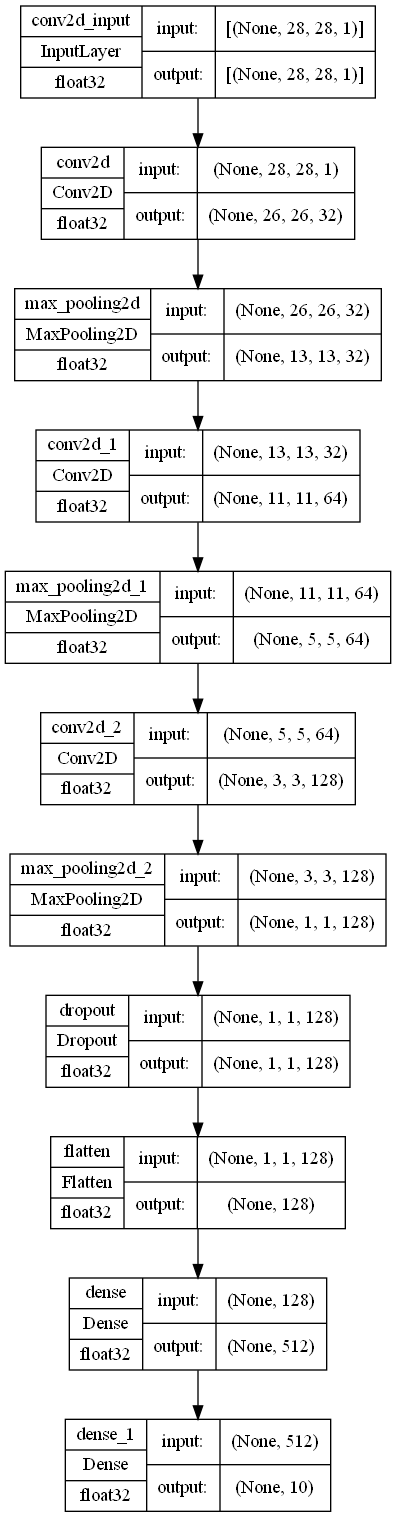

In [10]:
keras.utils.plot_model(model, "model.png", show_shapes=True,show_dtype=True,show_layer_names=True,)

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [13]:

import sys


early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=sys.maxsize,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/9223372036854775807


1875/1875 [==============================] - 19s 10ms/step - loss: 1.3654 - accuracy: 0.5506 - val_loss: 0.3179 - val_accuracy: 0.9029
Epoch 2/9223372036854775807
1868/1875 [============================>.] - ETA: 0s - loss: 0.3760 - accuracy: 0.8866

KeyboardInterrupt: 

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
#1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9156 - loss: 0.2316 - val_accuracy: 0.8872 - val_loss: 0.3271

NameError: name 'history' is not defined

In [15]:
mse_test = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1653 - accuracy: 0.9462


In [16]:
X_nuevas = X_test
y_pred = model.predict(X_nuevas)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[8.0362886e-05, 1.9366735e-05, 1.0959531e-02, ..., 9.8711920e-01,
        1.6266469e-05, 7.0016045e-05],
       [2.3378969e-04, 3.4661014e-06, 9.9966633e-01, ..., 1.4086010e-06,
        3.4525139e-05, 3.9312473e-09],
       [3.7256419e-04, 9.9767405e-01, 1.8217185e-04, ..., 5.6628499e-04,
        3.6216123e-04, 4.9607988e-05],
       ...,
       [1.4403621e-06, 1.8751291e-05, 2.9954974e-06, ..., 4.2848769e-06,
        2.1477035e-04, 5.2057328e-03],
       [5.1839342e-03, 3.2197630e-03, 1.4048200e-03, ..., 3.6238420e-03,
        2.5305746e-02, 4.3352298e-03],
       [7.4989587e-04, 3.3744630e-08, 3.6079262e-05, ..., 4.7144133e-09,
        2.5721167e-06, 1.9831836e-07]], dtype=float32)

In [17]:
# Probabilidad de que sea uno de los 10 Clas Names
y_pred.round(2)

array([[0.  , 0.  , 0.01, ..., 0.99, 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01],
       [0.01, 0.  , 0.  , ..., 0.  , 0.03, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [18]:
y_pred = np.argmax(y_pred, axis=1)
np.array(class_names)[y_pred]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
x=0
for index,i in enumerate(y_test):
    if i != y_pred[index]:
        x+=1
print("DIFERENTES %i:%i"%(x,len(y_test)))

DIFERENTES 538:10000


In [21]:
model.save('numeros.h5')

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


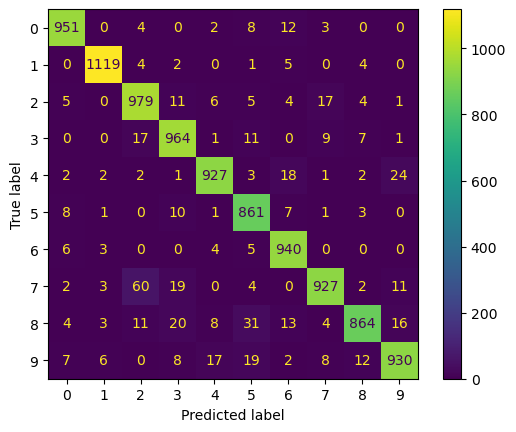

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [23]:
#!pip install tensorflowjs